## **How are in-demand skills trending for Data Analysts?**

In [7]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
df = pd.read_csv("C:/Users/user/Desktop/packages/data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")
def cleanup(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return skill_list
df["job_skills"] = df["job_skills"].apply(cleanup)

In [18]:
# Group the Skills by Month
df_US = df[(df["job_country"] == "United States") & (df["job_title"] == "Data Analyst")].copy()
df_US = df_US.explode("job_skills")
df_US_pivot = df_US.pivot_table(
    index = "job_posted_month", 
    columns = "job_skills", 
    aggfunc = "size"
).fillna(0)
df_US_pivot.reset_index(inplace = True)
df_US_pivot["month_no"] = pd.to_datetime(df_US_pivot["job_posted_month"], format = "%b").dt.month
df_US_pivot.sort_values(by = "month_no", inplace = True)
df_US_pivot.drop(columns = "month_no", inplace = True)
df_US_pivot.set_index("job_posted_month", inplace = True)
df_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,12.0,0.0,53.0,0.0,1.0,0.0,0.0,1.0,1.0,8.0,...,2.0,0.0,0.0,2.0,10.0,0.0,169.0,0.0,0.0,3.0
Feb,13.0,0.0,34.0,1.0,2.0,0.0,0.0,4.0,2.0,7.0,...,0.0,5.0,1.0,1.0,21.0,1.0,128.0,0.0,0.0,2.0
Mar,11.0,0.0,41.0,1.0,3.0,0.0,0.0,6.0,2.0,4.0,...,1.0,2.0,0.0,2.0,14.0,3.0,142.0,0.0,0.0,4.0
Apr,5.0,0.0,57.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,0.0,0.0,1.0,24.0,4.0,143.0,1.0,0.0,2.0
May,6.0,1.0,35.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,20.0,0.0,92.0,0.0,0.0,1.0
Jun,10.0,3.0,33.0,1.0,1.0,0.0,2.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,15.0,2.0,126.0,0.0,0.0,2.0
Jul,13.0,0.0,33.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,15.0,2.0,101.0,0.0,1.0,0.0
Aug,9.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,1.0,15.0,1.0,112.0,0.0,0.0,5.0
Sep,7.0,0.0,19.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,11.0,0.0,65.0,0.0,0.0,2.0


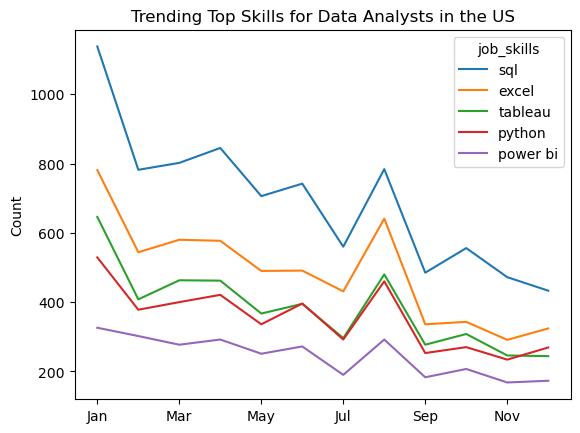

In [17]:
# Plot the Monthly Skill Counts
top_5 = df_US["job_skills"].value_counts().head().index
df_US_pivot[top_5].plot(kind = "line")
plt.title("Trending Top Skills for Data Analysts in the US")
plt.xlabel("")
plt.ylabel("Count")
plt.show()